In [ ]:
# Code for the Book: International Stock Picking A.I. INVESTOR: A Guide to Build.
# Website: ai-investor.net
# Code needs am "All-In-One" subscription from the (presumably) nice people at https://eodhistoricaldata.com/. 
# Check the book text to see if they have changed their service since mid-2021.

# Damon Lee 2021

# Feel free to fork this code for others to see what can be done with it.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Set the plotting DPI settings to be a bit higher.
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [7.0, 4.5]
plt.rcParams['figure.dpi'] = 150

from myFunctions import *

In [3]:
import pandas_datareader.data as pdr
def dataForTicker(ticker, start, end):
    tickerData = pdr.DataReader(ticker, "yahoo", start, end);
    return tickerData

# Some Performance Metrics

In [7]:
# Following on from Chapter 7 - 2 Backtester
# If we have a backtest for a strategy, here are some performance metrics
# These performance metrics are typically for much shorter term strategies, so they are left int he Appendix

In [14]:
# Taking some backtests results from previously
backTests = pd.read_csv('backtestBenchmarkRuns_gradBoost_BiAnnual.csv', index_col=0)
portValOverTime = backTests['0'] # Taking one of the backtests

# Taking S&P500 to compare
spy = dataForTicker('spy', portValOverTime.index[0], portValOverTime.index[-1]) # ISF.MI for FTSE 100
spy = getPortfolioRelativeTimeSeries(spy)

In [15]:
# Sharpe Ratio
def calcSharpeRatio(priceDataSeriesRelative, numberOfYears=11, Rf=0.016):
    '''
    Takes portfolio relative performance DataFrame and 
    gives the Sharpe Ratio
    
    Risk free rate 10 year treasury yield of 1.6%
    https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
    
    1 year treasury yield is basically 0%...
    '''
    sigma = np.log(priceDataSeriesRelative / \
                   priceDataSeriesRelative.shift(-1)).std() * np.sqrt(256)
    
    R = priceDataSeriesRelative.iloc[-1] ** (1/numberOfYears) - 1
    
    return (R - Rf) / sigma


print('Sharpe ratio for bi-annual strategy neural net backtest is:',\
      np.round(calcSharpeRatio(portValOverTime),5))

print('Sharpe ratio for S&P500 in same period is:',\
      np.round(calcSharpeRatio(spy['Open']),5))

Sharpe ratio for bi-annual strategy neural net backtest is: 0.60047
Sharpe ratio for S&P500 in same period is: 0.66894


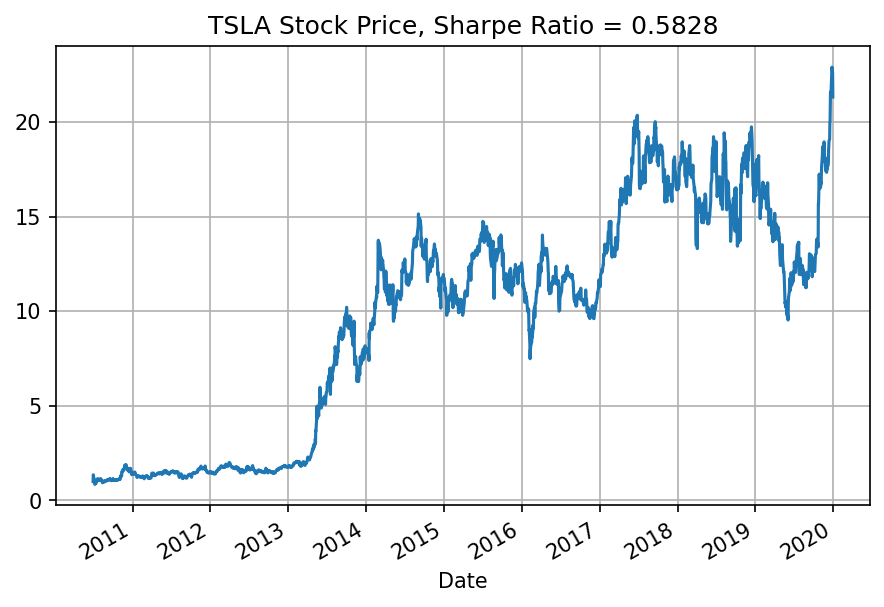

In [16]:
tsla = dataForTicker('tsla', portValOverTime.index[0], portValOverTime.index[-1])
tsla = getPortfolioRelativeTimeSeries(tsla)
tsla['Open'].plot()
plt.grid()
plt.title('TSLA Stock Price, Sharpe Ratio = ' + \
          str(np.round(calcSharpeRatio(tsla['Open']),4)));

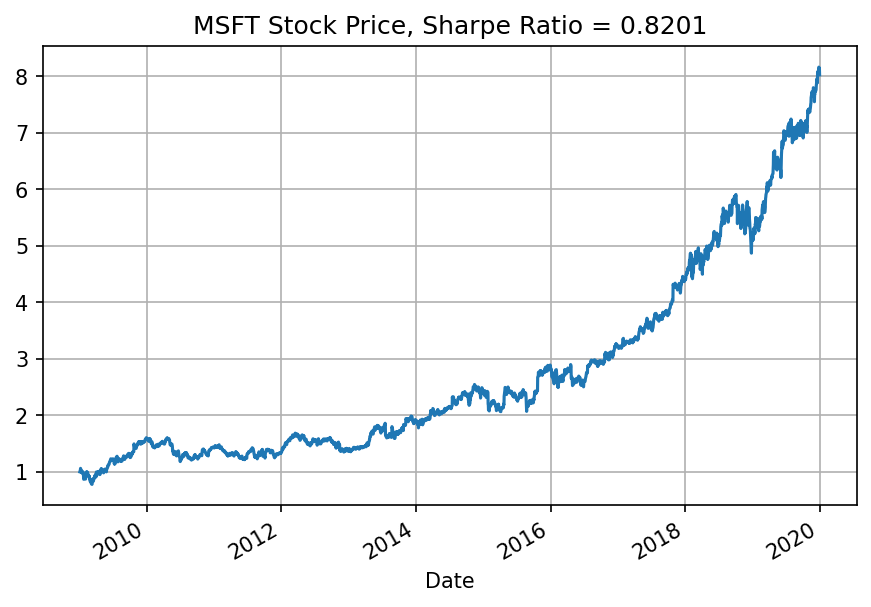

In [17]:
msft = dataForTicker('msft', portValOverTime.index[0], portValOverTime.index[-1])
msft = getPortfolioRelativeTimeSeries(msft)
calcSharpeRatio(msft['Open'])
msft['Open'].plot()
plt.grid()
plt.title('MSFT Stock Price, Sharpe Ratio = '+str(np.round(calcSharpeRatio(msft['Open']),4)));

In [18]:
# Information Ratio
def calcInformationRatio(priceDataSeriesRelative, SPY, numberOfYears=11):
    '''
    Calculate the information ratio between benchmark and 
    backtest.
    '''
    Rportfolio = priceDataSeriesRelative.iloc[-1] ** (1/numberOfYears) - 1
    
    RSandP500 = SPY['Open'].iloc[-1] ** (1/numberOfYears) - 1
    
    return (Rportfolio-RSandP500)/(portValOverTime-spy['Open']).std()*np.sqrt(256)


# Compare information ratio vs. S&P500 for some companies
# Information Ratio usually used for asset manager portformance
brka = dataForTicker('brk-a', portValOverTime.index[0], portValOverTime.index[-1])
brka = getPortfolioRelativeTimeSeries(brka)

print('Information Ratios vs. S&P500 benchmark:')
print('Berkshire Hathaway: \t', 
      np.round(calcInformationRatio(brka['Open'], spy),3))
print('Microsoft Corp. : \t', 
      np.round(calcInformationRatio(msft['Open'], spy),3))
print('AI Investor Backtest: \t', 
      np.round(calcInformationRatio(portValOverTime, spy),3))

Information Ratios vs. S&P500 benchmark:
Berkshire Hathaway: 	 nan
Microsoft Corp. : 	 nan
AI Investor Backtest: 	 nan


In [19]:
# Sortino Ratio
def calcSortinoRatio(priceDataSeriesRelative, numberOfYears=11, Rf=0.016):
    '''
    Takes portfolio relative performance DataFrame and 
    gives the Sharpe Ratio
    
    Risk free rate 10 year treasury yield of 1.6%
    https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield
    
    1 year treasury yield is basically 0%...
    '''
    returns = np.log(priceDataSeriesRelative/priceDataSeriesRelative.shift(-1))
    
    negativeSeries = returns[returns<0]
    
    neg_sigma = negativeSeries.std()*np.sqrt(256)
    
    R = priceDataSeriesRelative.iloc[-1] ** (1/numberOfYears) - 1
    
    return (R - Rf) / neg_sigma


print('Sortino ratio for bi-annual strategy neural net backtest is:',\
      np.round(calcSortinoRatio(portValOverTime),5))

print('Sortino ratio for S&P500 in same period is:',\
      np.round(calcSortinoRatio(spy['Open']),5))

Sortino ratio for bi-annual strategy neural net backtest is: 0.6379
Sortino ratio for S&P500 in same period is: 1.01672


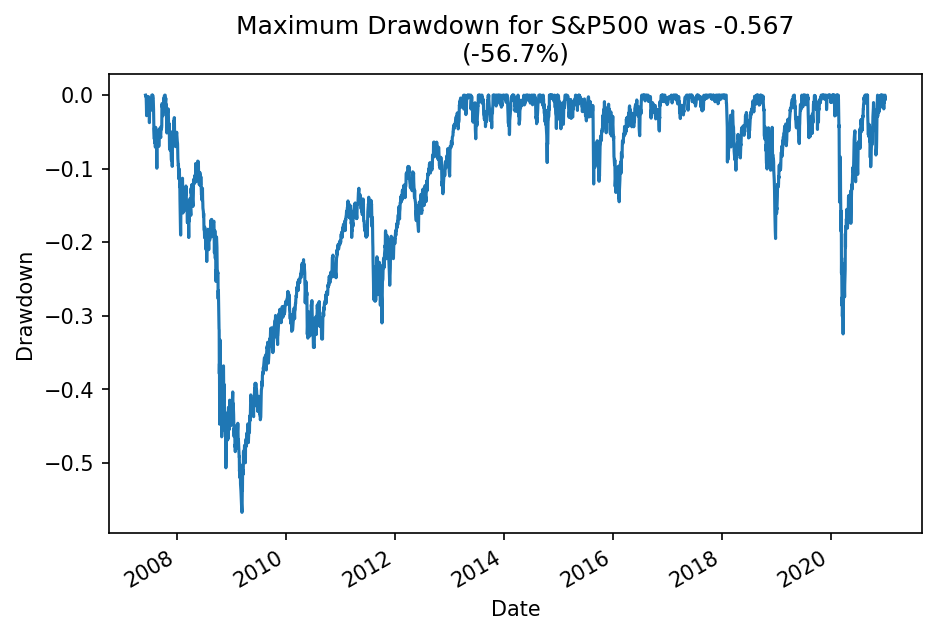

In [20]:
# Max Drawdown
spy = dataForTicker('spy', '2007-06-01', '2021-01-01') # ISF.MI for FTSE 100
spy = getPortfolioRelativeTimeSeries(spy)

def maxDrawdown(relativeReturnSeries):
    cumulativeMax = relativeReturnSeries.cummax()
    drawdown = (relativeReturnSeries - cumulativeMax) / cumulativeMax
    return drawdown

drawdown = maxDrawdown(spy['Open'])

drawdown.plot()
plt.ylabel('Drawdown')
plt.title('Maximum Drawdown for S&P500 was ' + \
          str(round(drawdown.min(), 4)) + \
          '\n('+str(round(drawdown.min()*100, 2))+'%)');